### Retrained K-means Clutering with Changes in Number of Clusters

#### Experiment Design: 

Preprocessing Step:
1. Start with Dataset of size D with some distribution 
2. Have K-means/K-centers run on this dataset

Running Step 
Goal: From sampling from an additional dataset of size S with the same underlying distribution, learn the boundaries of K-means/K-center clusters (the user has no knowledge of this)

User/Background Step: 
1. Sample from S
2. Online: Have the algorithm run K-means/K-clusters again
3. Run: Learn the boundaries of K-means
4. Go back to Step 1 

Datasets: Brightkite, Gowalla (SNAP) and RangeQueries (UCI)

Libraries

In [21]:
import copy
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.sparse.linalg import eigsh
import sklearn
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings

import explore_heuristic
import utils

In [22]:
data_brightkite = pd.read_csv('./Datasets/loc-brightkite_totalCheckins.txt', sep='\t', names=['zero', 'time', 'latitude', 'longitude', 'location id'])
data_gowalla = pd.read_csv('./Datasets/loc-gowalla_totalCheckins.txt', sep='\t', names=['zero', 'time', 'latitude', 'longitude', 'location id'])
data_rangequeries = pd.read_csv('./Datasets/Range-Queries-Aggregates.csv', names=['zero', 'x', 'y', 'x_range', 'y_range', 'count', 'sum_', 'avg'], skiprows=1)

print("data_brightkite:")
print(data_brightkite.head())
print(data_brightkite.info())
print(data_brightkite.describe())

print("data_gowalla:")
print(data_gowalla.head())
print(data_gowalla.info())
print(data_gowalla.describe())

print("data_rangequeries:")
print(data_rangequeries.head())
print(data_rangequeries.info())
print(data_rangequeries.describe())

data_brightkite:
   zero                  time   latitude   longitude  \
0     0  2010-10-17T01:48:53Z  39.747652 -104.992510   
1     0  2010-10-16T06:02:04Z  39.891383 -105.070814   
2     0  2010-10-16T03:48:54Z  39.891077 -105.068532   
3     0  2010-10-14T18:25:51Z  39.750469 -104.999073   
4     0  2010-10-14T00:21:47Z  39.752713 -104.996337   

                                location id  
0          88c46bf20db295831bd2d1718ad7e6f5  
1          7a0f88982aa015062b95e3b4843f9ca2  
2          dd7cd3d264c2d063832db506fba8bf79  
3  9848afcc62e500a01cf6fbf24b797732f8963683  
4          2ef143e12038c870038df53e0478cefc  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747287 entries, 0 to 4747286
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   zero         int64  
 1   time         object 
 2   latitude     float64
 3   longitude    float64
 4   location id  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 181.1+ MB
None
       

#### Cluster Number Experiments and Model Performance C
Experiment 1: Changing the Cluster Number, Fixing subsample size

Experiment 2: To be determined

In [29]:
"Number of Clusters + subsample size parameter initialization"
# Number of clusters
num_clusters_setting = [2, 3, 4, 5, 8, 10, 15, 20] #array of them
num_clusters_xticks = ["{}".format(num_clus) for num_clus in num_clusters_setting]
subsample_size = 500 # Constant for subsample size
fixed_number_of_rounds = 15 #Constant for Number of rounds
samp_num = 10

Number of clusters 2


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Mean accuracy 0.99938
Std accuracy 0.001592356743949045


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Mean accuracy 0.9994799999999999
Std accuracy 0.0013452137376640202
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Mean accuracy 0.9996
Std accuracy 0.0010954451150103333
Number of clusters 3


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9976599999999999
Std accuracy 0.0030073908957766056


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9968999999999998
Std accuracy 0.0030512292604784746
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, did not retrieve samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Mean accuracy 0.9972999999999999
Std accuracy 0.002944486372867094
Number of clusters 4


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9996
Std accuracy 0.0012328828005937964


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9986400000000001
Std accuracy 0.001808424728873172
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, did not retrieve samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Mean accuracy 0.9984400000000001
Std accuracy 0.0017794381135628195
Number of clusters 5


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9908999999999999
Std accuracy 0.015985931314752986


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9923000000000001
Std accuracy 0.014428790663115195
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, did not retrieve samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Mean accuracy 0.9914199999999999
Std accuracy 0.013755856934411623
Number of clusters 8


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9717999999999999
Std accuracy 0.0249647751842471


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9772599999999998
Std accuracy 0.020356139123124506
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Space filled, only retrieved 4 samples
Mean accuracy 0.9765399999999999
Std accuracy 0.0197258307809836
Number of clusters 10


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.92
Std accuracy 0.050976857494357174


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9104000000000001
Std accuracy 0.05068096289535154
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Mean accuracy 0.9364200000000001
Std accuracy 0.043654365188374906
Number of clusters 15


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.69638
Std accuracy 0.10590739162117062


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.6937000000000001
Std accuracy 0.09548670064464475
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, did not retrieve samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Mean accuracy 0.7088199999999998
Std accuracy 0.08826781746480425
Number of clusters 20


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.66242
Std accuracy 0.08921806767690052


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.6146
Std accuracy 0.08864964748942886
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, did not retrieve samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Mean accuracy 0.6501
Std accuracy 0.08119821426607852


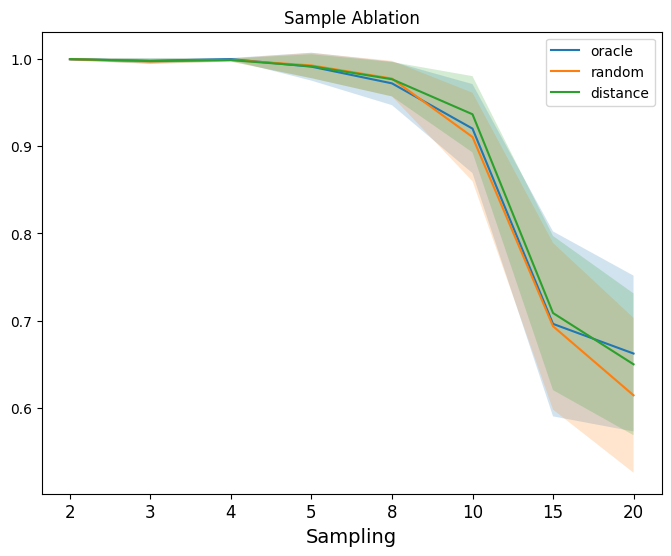

<Figure size 640x480 with 0 Axes>

In [25]:
"""BrightKite"""
reload(explore_heuristic)
reload(utils)

# Filter for relevant columns and drop any rows with missing latitude or longitude
location_brightkite = data_brightkite[['latitude', 'longitude']].dropna()
location_brightkite_array = location_brightkite[['latitude', 'longitude']].to_numpy()

oracle_acc_lists_bk = []
random_acc_lists_bk = []
distance_acc_lists_bk = []

samp_num = 10

for num_clusters in num_clusters_setting:
    print("Number of clusters {}".format(num_clusters))
    all_locations_k_means_brightkite = utils.ground_truth_kmeans(location_brightkite_array, 
                                                             num_clusters)
    subsample_brightkite_array = utils.random_subsample(location_brightkite_array, subsample_size)
    subsample_k_means_brightkite = utils.ground_truth_kmeans(subsample_brightkite_array, 
                                                            num_clusters)
    
    oracle_acc_lists_bk.append(
        utils.attack_experiment(subsample_brightkite_array, subsample_k_means_brightkite, 
        fixed_number_of_rounds, samp_num, method="random", retraining="query", 
        num_clusters=num_clusters)
    )
    random_acc_lists_bk.append(
        utils.attack_experiment(subsample_brightkite_array, subsample_k_means_brightkite, 
        fixed_number_of_rounds, samp_num, method="random", retraining="online", 
        num_clusters=num_clusters)
    )
    distance_acc_lists_bk.append(
        utils.attack_experiment(subsample_brightkite_array, subsample_k_means_brightkite, fixed_number_of_rounds,
        samp_num, method="distance", retraining="online", 
        num_clusters=num_clusters)
    )
utils.acc_plot(
    [oracle_acc_lists_bk, random_acc_lists_bk, distance_acc_lists_bk],
    ["oracle", "random", "distance"], xticks=num_clusters_xticks
)

Number of clusters 2


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Mean accuracy 1.0
Std accuracy 0.0


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Mean accuracy 1.0
Std accuracy 0.0
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Exceeded max iterations!
Space filled, only retrieved 4 samples
Mean accuracy 1.0
Std accuracy 0.0
Number of clusters 3


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default

Mean accuracy 1.0
Std accuracy 0.0


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 1.0
Std accuracy 0.0
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Mean accuracy 1.0
Std accuracy 0.0
Number of clusters 4


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.998
Std accuracy 0.0037202150475476583


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.99576
Std accuracy 0.01622166452618226
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Mean accuracy 0.9962399999999999
Std accuracy 0.012017587112228476
Number of clusters 5


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.99582
Std accuracy 0.007552986164425305


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9946600000000001
Std accuracy 0.008736383691207715
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, did not retrieve samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Mean accuracy 0.9953200000000001
Std accuracy 0.007736769351609244
Number of clusters 8


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9249800000000001
Std accuracy 0.05893080349019516


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9131000000000001
Std accuracy 0.0682098966426427
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, did not retrieve samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9299200000000001
Std accuracy 0.04492386448203225
Number of clusters 10


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9191800000000001
Std accuracy 0.0625185380507254


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.9140200000000002
Std accuracy 0.06491440209999626
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, did not retrieve samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, did not retrieve samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Mean accuracy 0.9149200000000001
Std accuracy 0.061248621208970885
Number of clusters 15


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.7331400000000001
Std accuracy 0.09707904202246745


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.74366
Std accuracy 0.09733285365178604
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Mean accuracy 0.7745400000000001
Std accuracy 0.08443973235391027
Number of clusters 20


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.54228
Std accuracy 0.10286924516102955


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.44936
Std accuracy 0.1203511129985926
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, did not retrieve samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 7 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 8 samples
Exceeded max iterations!
Space filled, only retrieved 7 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 5 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 2 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 3 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 9 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 1 samples
Exceeded max iterations!
Space filled, only retrieved 4 samples
Exceeded max iterations!
Space filled, only retrieved 6 samples


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exceeded max iterations!
Space filled, only retrieved 2 samples
Mean accuracy 0.44726
Std accuracy 0.11132390758502865


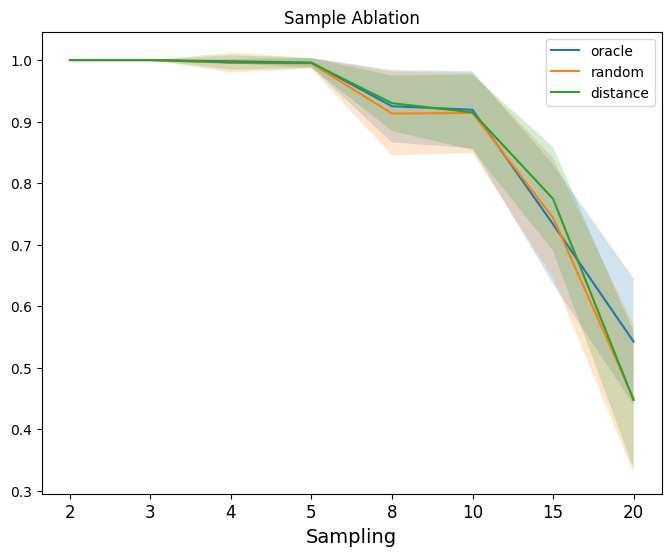

<Figure size 640x480 with 0 Axes>

In [31]:
"""Gowalla"""
reload(explore_heuristic)
reload(utils)
# Filter for relevant columns and drop any rows with missing latitude or longitude
location_gowalla = data_gowalla[['latitude', 'longitude']].dropna()
location_gowalla_array = location_gowalla[['latitude', 'longitude']].to_numpy()

oracle_acc_lists_go = []
random_acc_lists_go = []
distance_acc_lists_go = []

num_clusters_xticks = ["{}".format(num_clus) for num_clus in num_clusters_setting]

for num_clusters in num_clusters_setting:
    print("Number of clusters {}".format(num_clusters))
    all_locations_k_means_gowalla = utils.ground_truth_kmeans(location_gowalla_array, 
                                                            num_clusters)
    subsample_gowalla_array = utils.random_subsample(location_gowalla_array, subsample_size)
    subsample_k_means_gowalla = utils.ground_truth_kmeans(subsample_gowalla_array, 
                                                            num_clusters)
    
    oracle_acc_lists_go.append(
        utils.attack_experiment(subsample_gowalla_array, subsample_k_means_gowalla, 
        fixed_number_of_rounds, samp_num, method="random", retraining="query", 
        num_clusters=num_clusters)
    )
    random_acc_lists_go.append(
        utils.attack_experiment(subsample_gowalla_array, subsample_k_means_gowalla, 
        fixed_number_of_rounds, samp_num, method="random", retraining="online", 
        num_clusters=num_clusters)
    )
    distance_acc_lists_go.append(
        utils.attack_experiment(subsample_gowalla_array, subsample_k_means_gowalla, 
        fixed_number_of_rounds, samp_num, method="distance", retraining="online", 
        num_clusters=num_clusters)
    )
utils.acc_plot(
    [oracle_acc_lists_go, random_acc_lists_go, distance_acc_lists_go],
    ["oracle", "random", "distance"], xticks=num_clusters_xticks
)


Number of clusters 2


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Mean accuracy 0.7700199999999999
Std accuracy 0.10907666844930679


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Mean accuracy 0.7896599999999999
Std accuracy 0.09978458999264365


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

Mean accuracy 0.7961399999999998
Std accuracy 0.09946507125619526
Number of clusters 3


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.8651399999999998
Std accuracy 0.05744789291175091


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.8705399999999999
Std accuracy 0.05563873111421576


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.86238
Std accuracy 0.07544306197391513
Number of clusters 4


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.73122
Std accuracy 0.07676347829534563


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.7233200000000002
Std accuracy 0.07956894871744881


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.7044799999999999
Std accuracy 0.07108086662386721
Number of clusters 5


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.7194799999999998
Std accuracy 0.08165077831839694


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.70718
Std accuracy 0.07815988485150166


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.70536
Std accuracy 0.09071576709701572
Number of clusters 8


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.4329
Std accuracy 0.05308210621292264


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.42340000000000005
Std accuracy 0.05438639535766275


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.42834000000000005
Std accuracy 0.04907957212527428
Number of clusters 10


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.299
Std accuracy 0.04119854366358111


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.29802
Std accuracy 0.04157065792118282


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.28224
Std accuracy 0.05965452539413921
Number of clusters 15


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.17099999999999999
Std accuracy 0.046397844777532504


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.12147999999999998
Std accuracy 0.039622841897067405


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.13104000000000002
Std accuracy 0.049031810082843165
Number of clusters 20


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.13555999999999999
Std accuracy 0.032848232829179716


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.1466
Std accuracy 0.036223196987565855


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsuperv

Mean accuracy 0.15146
Std accuracy 0.029781678931853392


/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/unsupervised_project_fall2024/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


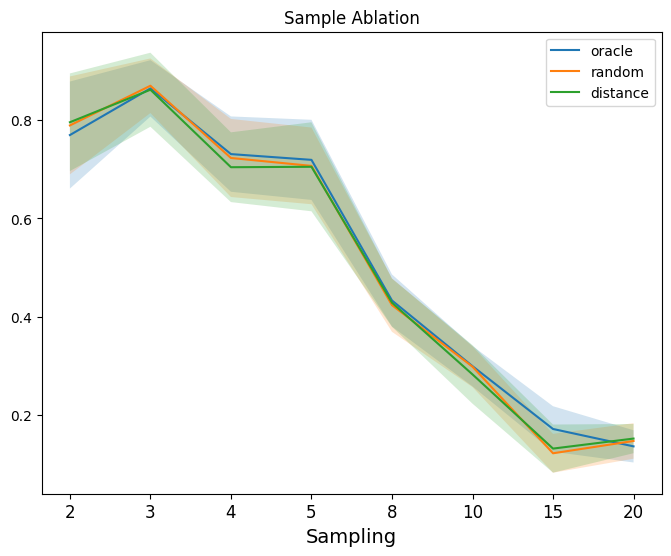

<Figure size 640x480 with 0 Axes>

In [32]:
"""rangequeries"""  
# Filter for relevant columns and drop any rows with missing latitude or longitude
xy_rangequeries = data_rangequeries[['x', 'y']].dropna()
xy_rangequeries_array = xy_rangequeries[['x', 'y']].to_numpy()

oracle_acc_lists_rq = []
random_acc_lists_rq = []
distance_acc_lists_rq = []

for num_clusters in num_clusters_setting:
    print("Number of clusters {}".format(num_clusters))
    all_locations_k_means_rangequeries = utils.ground_truth_kmeans(xy_rangequeries_array, 
                                                            num_clusters)
    subsample_rangequeries_array = utils.random_subsample(xy_rangequeries_array, subsample_size)
    subsample_k_means_rangequeries = utils.ground_truth_kmeans(subsample_rangequeries_array, 
                                                            num_clusters)
    
    oracle_acc_lists_rq.append(
        utils.attack_experiment(subsample_rangequeries_array, subsample_k_means_rangequeries, 
        fixed_number_of_rounds, samp_num, method="random", retraining="query", 
        num_clusters=num_clusters)
    )
    random_acc_lists_rq.append(
        utils.attack_experiment(subsample_rangequeries_array, subsample_k_means_rangequeries, 
        fixed_number_of_rounds, samp_num, method="random", retraining="online", 
        num_clusters=num_clusters)
    )
    distance_acc_lists_rq.append(
        utils.attack_experiment(subsample_rangequeries_array, subsample_k_means_rangequeries, 
        fixed_number_of_rounds, samp_num, method="distance", retraining="online", 
        num_clusters=num_clusters)
    )

utils.acc_plot(
    [oracle_acc_lists_rq, random_acc_lists_rq, distance_acc_lists_rq],
    ["oracle", "random", "distance"], xticks=num_clusters_xticks
)    